In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import plotly.express as px
%pip install sklearn
from sklearn.preprocessing import StandardScaler

SyntaxError: invalid syntax (3659118991.py, line 7)

In [ ]:
df=pd.read_csv('/Users/aysia/Downloads/AC597B1_ALL_LATEST.csv')

In [ ]:
df.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
0,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,MDG_0000000026,1986,YEAR,400,COUNTRY,PUBLISHED,Maternal mortality ratio,Jordan,92.869451,59.544327,124.284051
1,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,MDG_0000000026,1986,YEAR,404,COUNTRY,PUBLISHED,Maternal mortality ratio,Kenya,613.754019,450.155315,846.419137
2,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,MDG_0000000026,1986,YEAR,408,COUNTRY,PUBLISHED,Maternal mortality ratio,Democratic People's Republic of Korea,68.482582,42.626085,112.854504
3,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,MDG_0000000026,1986,YEAR,410,COUNTRY,PUBLISHED,Maternal mortality ratio,Republic of Korea,35.285310,29.180858,42.271209
4,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,MDG_0000000026,1986,YEAR,414,COUNTRY,PUBLISHED,Maternal mortality ratio,Kuwait,10.634715,7.266000,15.373126


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7878 entries, 0 to 7877
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  7878 non-null   object 
 1   IND_CODE                7878 non-null   object 
 2   IND_UUID                7878 non-null   object 
 3   IND_PER_CODE            7878 non-null   object 
 4   DIM_TIME                7878 non-null   int64  
 5   DIM_TIME_TYPE           7878 non-null   object 
 6   DIM_GEO_CODE_M49        7878 non-null   int64  
 7   DIM_GEO_CODE_TYPE       7878 non-null   object 
 8   DIM_PUBLISH_STATE_CODE  7878 non-null   object 
 9   IND_NAME                7878 non-null   object 
 10  GEO_NAME_SHORT          7878 non-null   object 
 11  RATE_PER_100000_N       7878 non-null   float64
 12  RATE_PER_100000_NL      7878 non-null   float64
 13  RATE_PER_100000_NU      7878 non-null   float64
dtypes: float64(3), int64(2), object(9)
memor

,DIM_TIME,DIM_GEO_CODE_M49,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
count,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000
mean,2004.000000,445.584158,232.260787,169.674148,319.287221
std,11.255343,266.527231,397.345272,279.451773,556.556350
min,1985.000000,1.000000,0.107251,0.064314,0.163086
25%,1994.000000,212.000000,18.619554,14.463331,24.661337
50%,2004.000000,437.000000,71.728175,53.904682,91.155687
75%,2014.000000,678.000000,301.323682,223.858306,427.421233
max,2023.000000,958.000000,8044.862936,5233.783190,11640.088140


In [ ]:
df.isnull().sum().sort_values(ascending=False)

IND_ID                    0
IND_CODE                  0
IND_UUID                  0
IND_PER_CODE              0
DIM_TIME                  0
DIM_TIME_TYPE             0
DIM_GEO_CODE_M49          0
DIM_GEO_CODE_TYPE         0
DIM_PUBLISH_STATE_CODE    0
IND_NAME                  0
GEO_NAME_SHORT            0
RATE_PER_100000_N         0
RATE_PER_100000_NL        0
RATE_PER_100000_NU        0
dtype: int64

In [ ]:
df.columns

Index(['IND_ID', 'IND_CODE', 'IND_UUID', 'Year', 'DIM_TIME', 'DIM_TIME_TYPE',
       'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE', 'DIM_PUBLISH_STATE_CODE',
       'IND_NAME', 'Country', 'MMR', 'RATE_PER_100000_NL',
       'RATE_PER_100000_NU'],
      dtype='object')

In [ ]:
#We inspect basic structure, variable types, and missing/null values based on WHO data. 
##Key columns may include:
- Country / Location
- Year
- Maternal Mortality Ratio (MMR)
- Region / Continent
- GDP per capita
- Fertility rate
- Skilled birth attendance (%)


SyntaxError: invalid syntax (2179700791.py, line 5)

In [ ]:
if 'DIM_TIME' in df.columns:
    df['Year'] = pd.to_numeric(df['DIM_TIME'], errors='coerce')
    
df['MMR'] = pd.to_numeric(df['MMR'], errors='coerce')
df['Year'] = df['Year'].astype('Int64').astype(str)
hover_cols = {'Year': True, 'Country': True, 'MMR': ':.2f'}


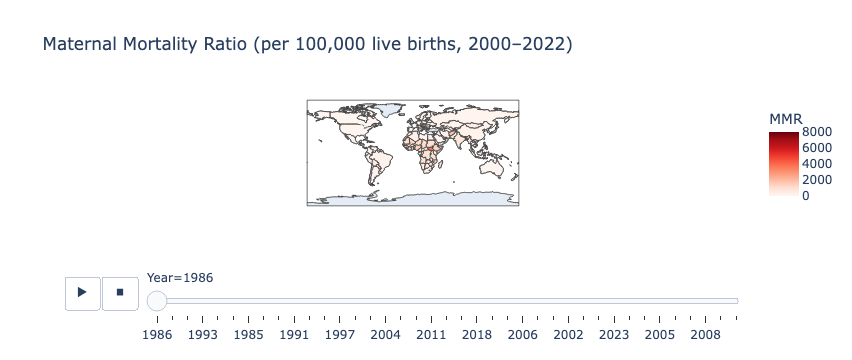

In [ ]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="MMR",
    hover_name="Country",
    hover_data=hover_cols,
    animation_frame="Year",
    color_continuous_scale="Reds",
    range_color=[0, df['MMR'].max()],
    title="Maternal Mortality Ratio (per 100,000 live births, 2000–2022)"
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 800
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 300

fig.show()


In [ ]:
#This choropleth map visualizes spatial and temporal variation in maternal mortality rates. You can animate through years to visualize improvements or stagnation over time.


In [ ]:
top5 = df.sort_values(by='MMR', ascending=False).head(10)
bottom5 = df.sort_values(by='MMR', ascending=True).head(10)

print("Ten Countries with Highest Maternal Mortality:")
display(top5)

print("\n Ten Countries with Lowest Maternal Mortality:")
display(bottom5)


Ten Countries with Highest Maternal Mortality:


,IND_ID,IND_CODE,IND_UUID,Year,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,Country,MMR,RATE_PER_100000_NL,RATE_PER_100000_NU
1603,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1987,1987,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,8044.862936,5233.783190,11640.088140
837,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1992,1992,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,7597.249222,5192.792799,10725.571370
258,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1993,1993,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,7536.612926,5163.569726,10598.929930
5098,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1998,1998,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,7514.037909,5162.068455,10565.334610
1766,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1994,1994,YEAR,646,COUNTRY,PUBLISHED,Maternal mortality ratio,Rwanda,5721.358521,3825.714020,8218.957556
1074,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1988,1988,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,5535.012306,3653.903856,7979.272997
418,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1989,1989,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,5102.938482,3406.157688,7288.333358
1945,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1990,1990,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,4876.694750,3298.693545,6971.711816
1443,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1991,1991,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,4764.459066,3236.508445,6748.570179
1256,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1995,1995,YEAR,728,COUNTRY,PUBLISHED,Maternal mortality ratio,South Sudan,4430.060359,3029.119911,6180.033420



 Ten Countries with Lowest Maternal Mortality:


,IND_ID,IND_CODE,IND_UUID,Year,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,Country,MMR,RATE_PER_100000_NL,RATE_PER_100000_NU
5713,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2023,2023,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.107251,0.064314,0.177018
3695,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2021,2021,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.124846,0.095921,0.163086
2808,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2011,2011,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.139308,0.113148,0.173472
4036,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2010,2010,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.139811,0.113415,0.173211
6131,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2012,2012,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.142136,0.114968,0.175366
4931,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2020,2020,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.142221,0.111530,0.181991
2626,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2004,2004,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.143310,0.116540,0.177423
5949,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2005,2005,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.143792,0.116522,0.177923
4749,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2013,2013,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.145816,0.117172,0.180774
3513,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,2014,2014,YEAR,184,COUNTRY,PUBLISHED,Maternal mortality ratio,Cook Islands,0.148730,0.119018,0.184185


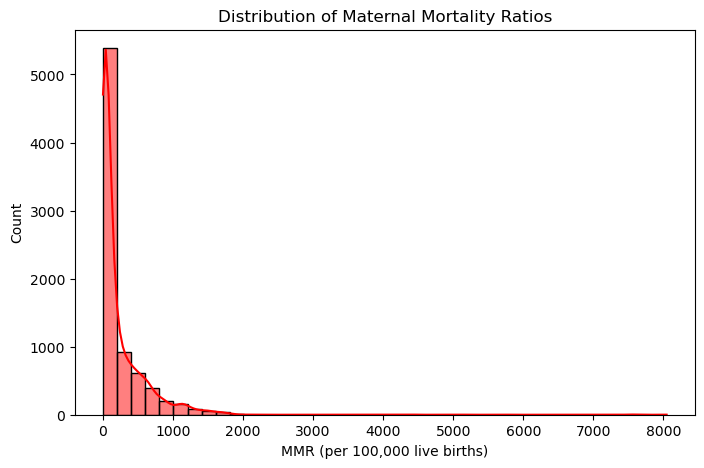

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['MMR'], bins=40, kde=True, color='red')
plt.title('Distribution of Maternal Mortality Ratios')
plt.xlabel('MMR (per 100,000 live births)')
plt.show()

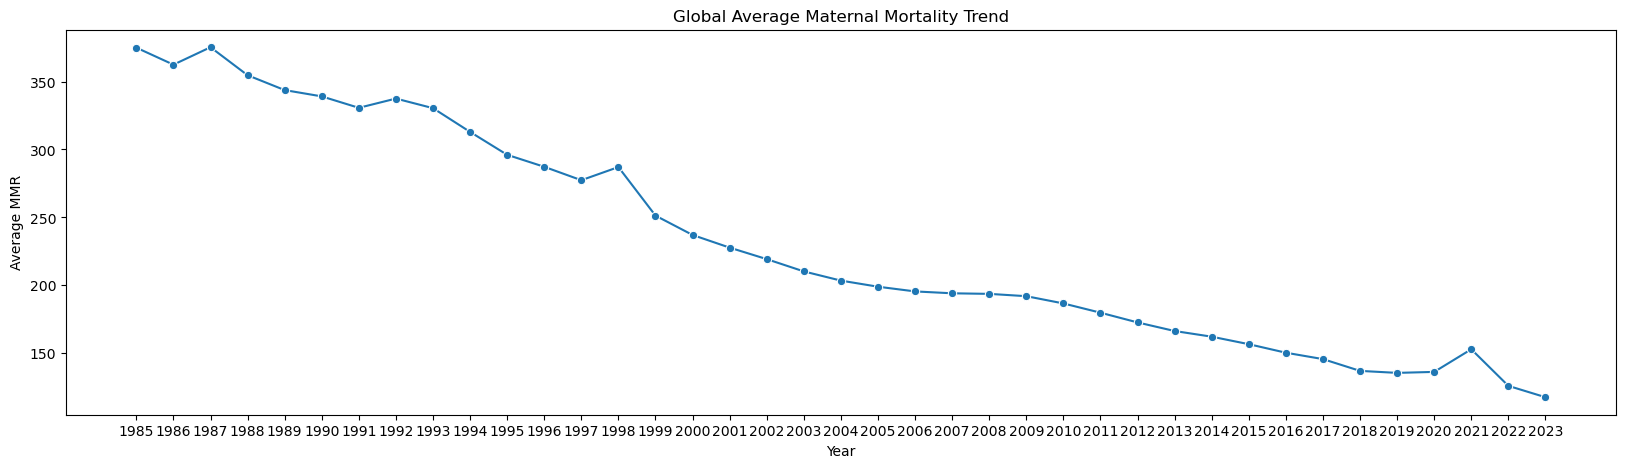

In [ ]:
trend = df.groupby('Year')['MMR'].mean().reset_index()

plt.figure(figsize=(20,5))
sns.lineplot(x='Year', y='MMR', data=trend, marker='o')
plt.title('Global Average Maternal Mortality Trend')
plt.ylabel('Average MMR')
plt.show()

/var/folders/bk/7mkp0vz90ksf2fzc1gkl0wlm0000gn/T/ipykernel_3623/2058960060.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




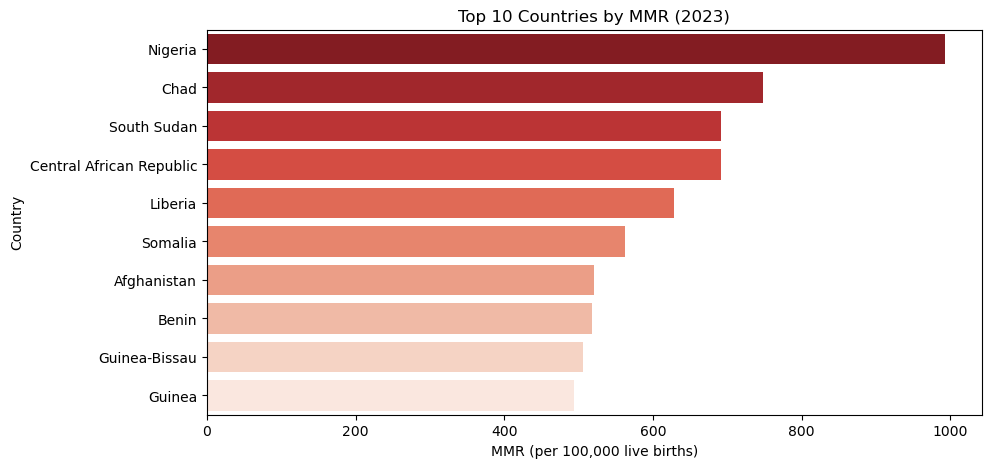

In [ ]:
latest_year = df['Year'].max()
latest = df[df['Year'] == latest_year].sort_values(by='MMR', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='MMR', y='Country', data=latest, palette='Reds_r')
plt.title(f'Top 10 Countries by MMR ({latest_year})')
plt.xlabel('MMR (per 100,000 live births)')
plt.show()b

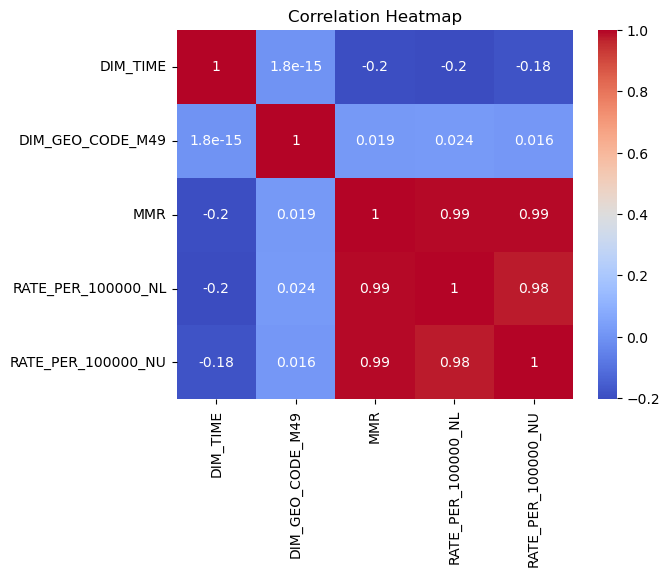

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
q1, q3 = df['MMR'].quantile([0.25, 0.75])
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = df[df['MMR'] > upper_bound]
print("Number of high MMR outliers:", len(outliers))
display(outliers.head())

Number of high MMR outliers: 665


,IND_ID,IND_CODE,IND_UUID,Year,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,Country,MMR,RATE_PER_100000_NL,RATE_PER_100000_NU
6,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1986,1986,YEAR,418,COUNTRY,PUBLISHED,Maternal mortality ratio,Lao People's Democratic Republic,962.954716,651.347884,1377.780318
10,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1986,1986,YEAR,430,COUNTRY,PUBLISHED,Maternal mortality ratio,Liberia,1677.834781,1085.982739,2357.515402
14,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1986,1986,YEAR,450,COUNTRY,PUBLISHED,Maternal mortality ratio,Madagascar,730.314760,531.813348,974.780018
15,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1986,1986,YEAR,454,COUNTRY,PUBLISHED,Maternal mortality ratio,Malawi,1118.446386,749.176089,1525.084049
18,AC597B1MDG_0000000026,MDG_0000000026,AC597B1,1986,1986,YEAR,466,COUNTRY,PUBLISHED,Maternal mortality ratio,Mali,1183.877036,910.480943,1537.015149


In [ ]:
### Key Insights
#**Global trend:** MMR has generally declined from 2000–2022, though unevenly across regions.
#**Hotspots:** Sub-Saharan Africa and parts of South Asia remain highest-risk regions.
#**Top performers:** Northern/Western Europe, Japan, Australia show the lowest MMR (<10).
#**Inequality:** More than a 100× difference exists between the safest and riskiest countries.
#**Outliers:** Nigeria, Chad, Sierra Leone, and South Sudan consistently rank highest.

: ['Jordan', "Democratic People's Republic of Korea", 'Republic of Korea', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Latvia', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Monaco', 'Mongolia', 'Republic of Moldova', 'Montenegro', 'Morocco', 'Mozambique', 'Oman', 'Namibia', 'Nauru', 'Nepal', 'Netherlands (Kingdom of the)', 'Vanuatu', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Micronesia (Federated States of)', 'Marshall Islands', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Guinea-Bissau', 'Timor-Leste', 'Puerto Rico', 'Qatar', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Viet Nam', 'Slovenia', 'Somalia', 'Zimba

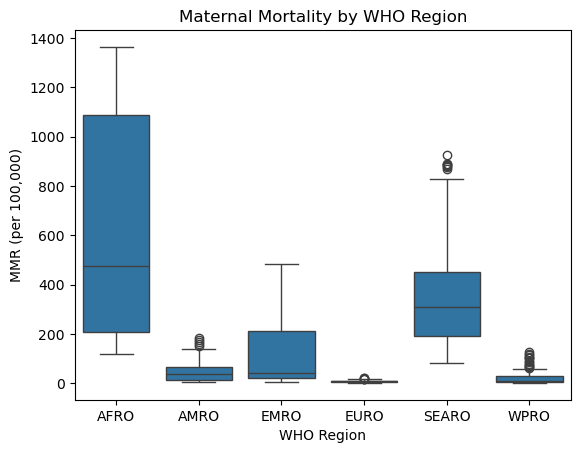

In [ ]:
wb = pd.read_csv('/Users/aysia/Downloads/who_region_lookup_template.csv')  
df['Country'] = df['Country'].str.strip()
wb['Country'] = wb['Country'].str.strip()

dfm = df.merge(wb, on='Country', how='left')

missing = dfm[dfm['WHO_Region'].isna()]['Country'].drop_duplicates()
if len(missing):
    print(":", missing.tolist())

sns.boxplot(x='WHO_Region', y='MMR', data=dfm,
            order=['AFRO','AMRO','EMRO','EURO','SEARO','WPRO'])
plt.title('Maternal Mortality by WHO Region')
plt.xlabel('WHO Region'); plt.ylabel('MMR (per 100,000)')
plt.show()


In [ ]:
dfcdc=pd.read_csv('/Users/aysia/Downloads/VSRR_Provisional_Maternal_Death_Counts_and_Rates (1).csv')

In [ ]:
dfcdc.head(5)

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,07/06/2025,United States,Total,Total,2019,1,12 month-ending,01/31/2019,660,"3,787,776",17.4,NaN
1,07/06/2025,United States,Total,Total,2019,2,12 month-ending,02/28/2019,653,"3,783,489",17.3,NaN
2,07/06/2025,United States,Total,Total,2019,3,12 month-ending,03/31/2019,657,"3,771,682",17.4,NaN
3,07/06/2025,United States,Total,Total,2019,4,12 month-ending,04/30/2019,668,"3,772,235",17.7,NaN
4,07/06/2025,United States,Total,Total,2019,5,12 month-ending,05/31/2019,706,"3,767,999",18.7,NaN


In [ ]:
dfcdc.info()
dfcdc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data As Of               750 non-null    object 
 1   Jurisdiction             750 non-null    object 
 2   Group                    750 non-null    object 
 3   Subgroup                 750 non-null    object 
 4   Year of Death            750 non-null    int64  
 5   Month of Death           750 non-null    int64  
 6   Time Period              750 non-null    object 
 7   Month Ending Date        750 non-null    object 
 8   Maternal Deaths          666 non-null    object 
 9   Live Births              750 non-null    object 
 10  Maternal Mortality Rate  616 non-null    float64
 11  Footnote                 134 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 70.4+ KB


,Year of Death,Month of Death,Maternal Mortality Rate
count,750.000000,750.000000,616.000000
mean,2021.640000,6.320000,32.299675
std,1.809632,3.501516,28.257684
min,2019.000000,1.000000,0.000000
25%,2020.000000,3.000000,14.700000
50%,2022.000000,6.000000,19.300000
75%,2023.000000,9.000000,42.675000
max,2025.000000,12.000000,141.900000


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

df.columns


Index(['Country', 'Year', 'Year', 'MMR'], dtype='object')

In [ ]:
dfcdc = dfcdc.dropna(subset=['Maternal Mortality Rate'])

dfcdc['Year of Death'] = pd.to_numeric(dfcdc['Year of Death'], errors='coerce')
dfcdc['Maternal Mortality Rate'] = pd.to_numeric(dfcdc['Maternal Mortality Rate'], errors='coerce')
dfcdc['Maternal Deaths'] = pd.to_numeric(dfcdc['Maternal Deaths'], errors='coerce')

dfcdc.info()


<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 749
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data As Of               616 non-null    object 
 1   Jurisdiction             616 non-null    object 
 2   Group                    616 non-null    object 
 3   Subgroup                 616 non-null    object 
 4   Year of Death            616 non-null    int64  
 5   Month of Death           616 non-null    int64  
 6   Time Period              616 non-null    object 
 7   Month Ending Date        616 non-null    object 
 8   Maternal Deaths          604 non-null    float64
 9   Live Births              616 non-null    object 
 10  Maternal Mortality Rate  616 non-null    float64
 11  Footnote                 0 non-null      object 
dtypes: float64(2), int64(2), object(8)
memory usage: 62.6+ KB


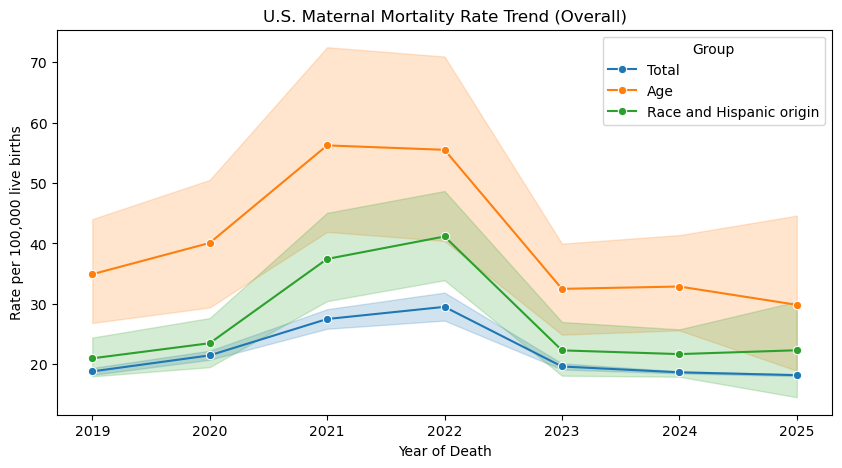

In [ ]:
us_trend = dfcdc[dfcdc['Jurisdiction'] == 'United States']

plt.figure(figsize=(10,5))
sns.lineplot(data=us_trend, x='Year of Death', y='Maternal Mortality Rate', hue='Group', marker='o')
plt.title('U.S. Maternal Mortality Rate Trend (Overall)')
plt.ylabel('Rate per 100,000 live births')
plt.xlabel('Year of Death')
plt.legend(title='Group')
plt.show()

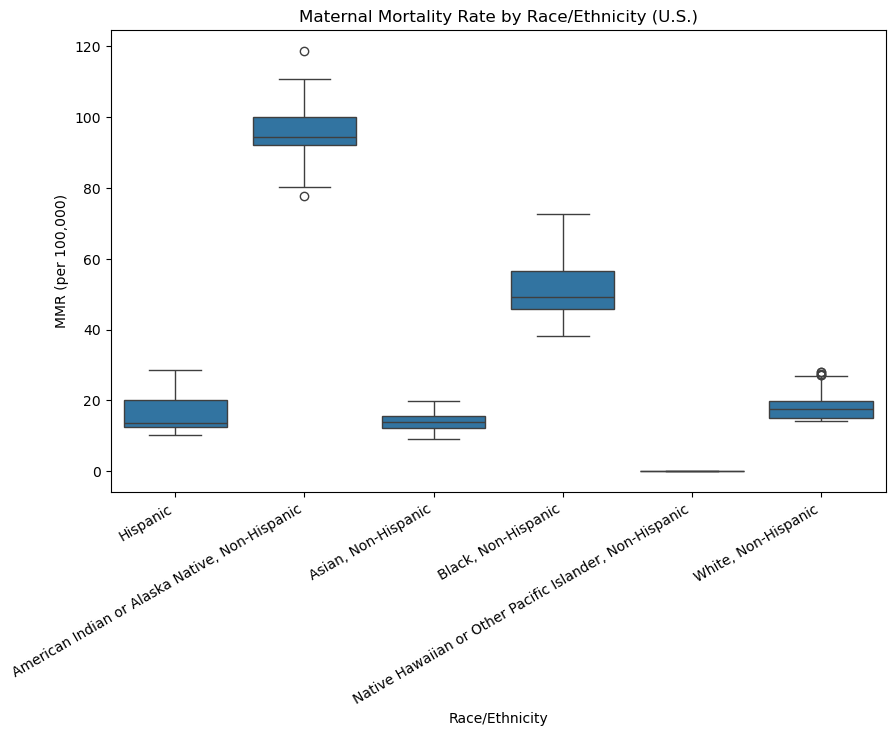

In [ ]:
race_df = dfcdc[(dfcdc['Group'].str.contains('Race', case=False, na=False)) & 
             (dfcdc['Jurisdiction'] == 'United States')]

plt.figure(figsize=(10,6))
sns.boxplot(x='Subgroup', y='Maternal Mortality Rate', data=race_df)
plt.xticks(rotation=30, ha='right')
plt.title('Maternal Mortality Rate by Race/Ethnicity (U.S.)')
plt.ylabel('MMR (per 100,000)')
plt.xlabel('Race/Ethnicity')
plt.show()


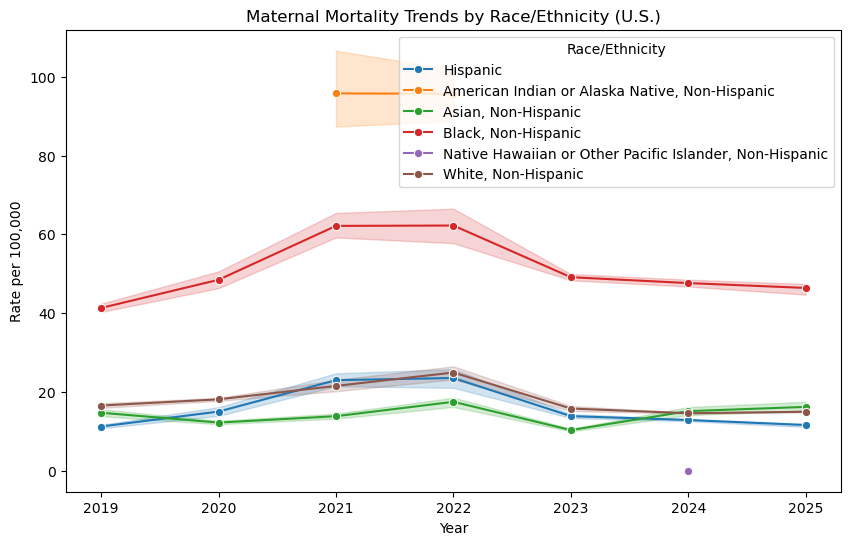

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=race_df, x='Year of Death', y='Maternal Mortality Rate', hue='Subgroup', marker='o')
plt.title('Maternal Mortality Trends by Race/Ethnicity (U.S.)')
plt.ylabel('Rate per 100,000')
plt.xlabel('Year')
plt.legend(title='Race/Ethnicity')
plt.show()


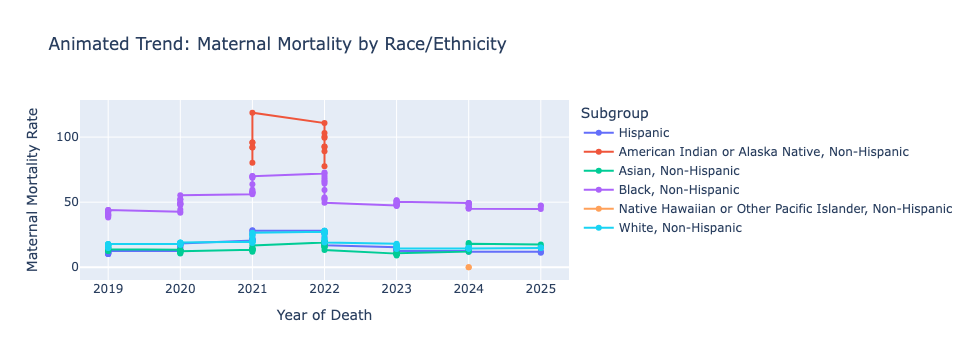

In [62]:
fig = px.line(
    race_df,
    x='Year of Death',
    y='Maternal Mortality Rate',
    color='Subgroup',
    title='Animated Trend: Maternal Mortality by Race/Ethnicity',
    markers=True
)
fig.update_traces(mode='lines+markers')
fig.show()


In [ ]:
### Key Findings
#The overall **U.S. maternal mortality rate** has increased in recent years, despite global declines.
#**Black and Native American women** consistently experience the highest mortality rates — often 2–3× higher than White women.
# **State-level variation** is large: some states report <10 per 100,000, others >60.
# **Maternal deaths** correlate strongly with total live births and regional disparities.
# **Trend analysis** shows worsening rates post-2018, especially for non-Hispanic Black mothers.
